In [1]:
import random
import networkx as nx

In [2]:
STATUS = 'status'

INFECTED = 'infected'
SUSCEPTIBLE = 'susceptible'
RECOVERED = 'recovered'

In [117]:
def sir_model_on_network(G, p, max_iters = 10000):

    init_susceptible(G)
    init_infected(G)

    i = 0
    history = [get_status(G)]
    to_recover = []
    
    while any_infected(G) and i < max_iters:
        if to_recover:
            set_recovered(G, to_recover)

        infected_nodes = get_infected(G)
        to_infect = []
        for node in infected_nodes:
            for neighbor in get_susceptible_neighbors(G, node):
                if random.random() < p:
                    to_infect.append(neighbor)
        to_recover = get_infected(G)
        set_infected(G, to_infect)

        history.append(get_status(G))
        i += 1
    return history

In [118]:
def init_susceptible(G):
    nx.set_node_attributes(G, SUSCEPTIBLE, name = STATUS)
    
def init_infected(G):
    first_infected_node = random.choice(list(G.nodes()))
    set_infected(G, [first_infected_node])

def any_infected(G):
    return INFECTED in nx.get_node_attributes(G, STATUS).values()

def get_infected(G):
    return [k for k, v in nx.get_node_attributes(G, STATUS).items() if v == INFECTED]

def get_susceptible_neighbors(G, node):
    return [v for v in G.neighbors(node) if G.nodes[v][STATUS] == SUSCEPTIBLE]

def get_status(G):
    return nx.get_node_attributes(G, STATUS)

def set_infected(G, infected_list):
    infected_nodes = {u:{STATUS:INFECTED} for u in infected_list}
    nx.set_node_attributes(G, infected_nodes)
    
def set_recovered(G, recovered_list):
    recovered_nodes = {u:{STATUS:RECOVERED} for u in recovered_list}
    nx.set_node_attributes(G, recovered_nodes)

In [119]:
G = nx.grid_2d_graph(10, 10)
p = 0.6

In [120]:
results = sir_model_on_network(G, p)

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# B

In [122]:
data = pd.DataFrame(results)

In [123]:
res = data.apply(lambda x: x.value_counts(normalize = True), axis = 1).fillna(0)

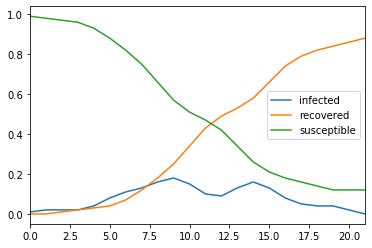

In [124]:
res.plot()

In [125]:
ps = np.linspace(0, 1, 21)

# F

In [129]:
def generate_node_colors(status):
    return [map_colors(v) for v in status.values()]


def map_colors(value):
    if value == SUSCEPTIBLE:
        return 'green'
    elif value == INFECTED:
        return 'red'
    elif value == RECOVERED:
        return 'yellow'
    else:
        raise ValueError('Incorrect value!')

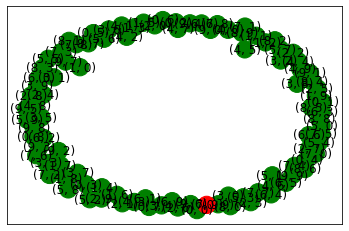

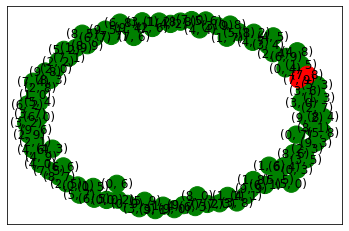

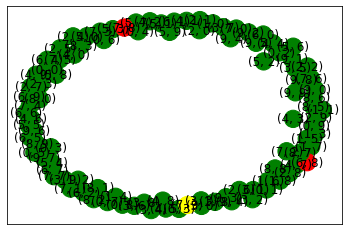

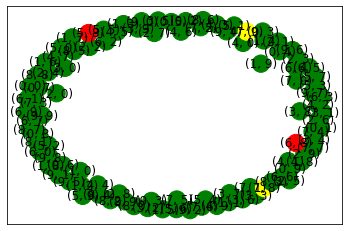

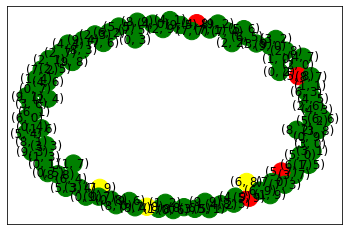

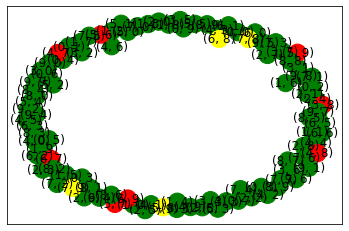

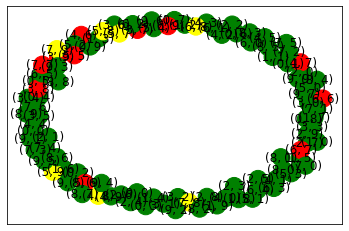

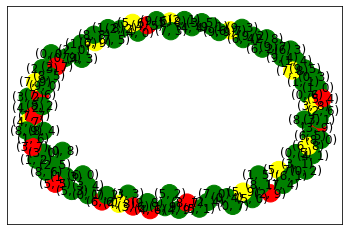

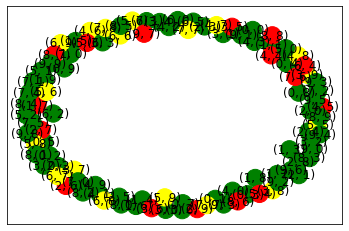

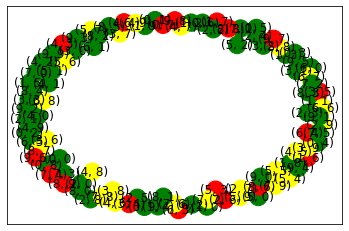

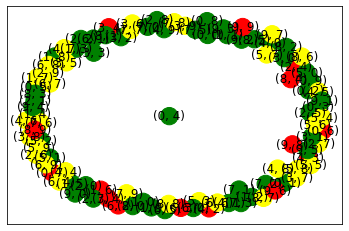

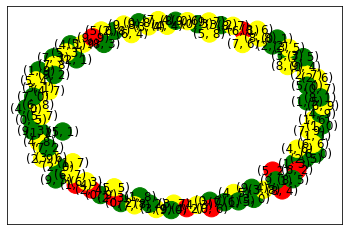

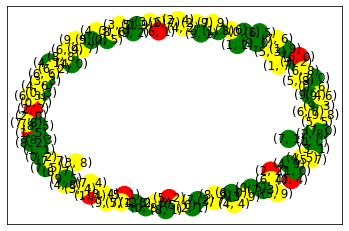

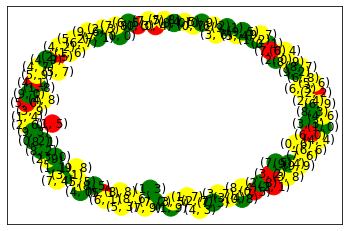

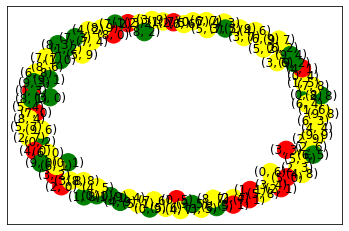

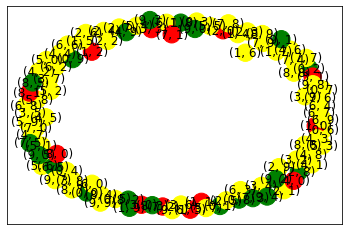

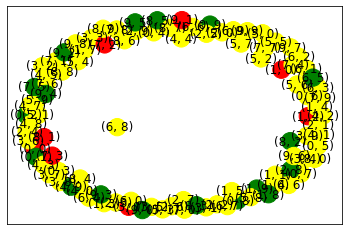

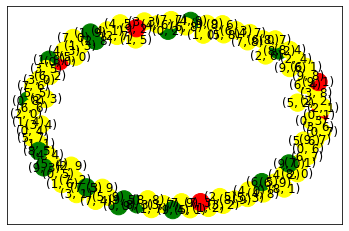

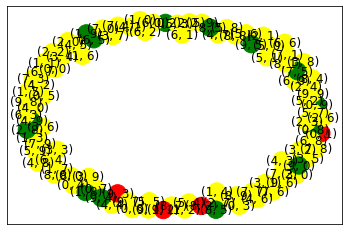

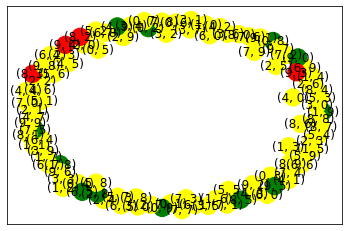

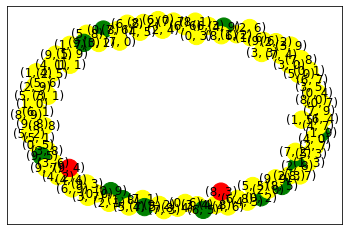

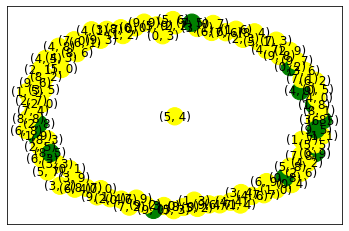

In [148]:

for status in results:
    G = nx.Graph()
    G.add_nodes_from(status)
    node_color = generate_node_colors(status)
    
    nx.draw_networkx(G, node_color = node_color)
    plt.show()